In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from seaborn import color_palette
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

In [3]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [4]:
df.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(42000, 785)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
df.describe

<bound method NDFrame.describe of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

     

Integer Value : 7


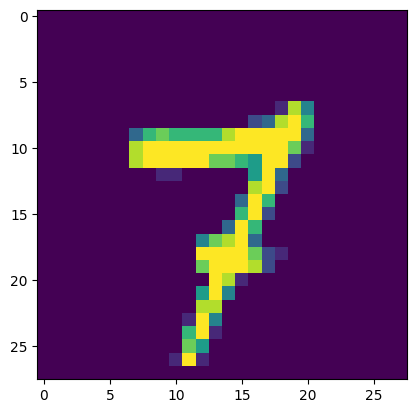

In [8]:
sample = df.sample()
index = sample.index[0]
print(f"Integer Value : {df.iloc[index, 0]}")
plt.imshow(df.iloc[index, 1:].values.reshape(28, 28))

In [9]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [11]:
print(f"x_train shape:{x_train.shape}")
print(f"x_test shape:{x_test.shape}")
print(f"y_train shape:{y_train.shape}")
print(f"y_test shape:{y_test.shape}")

x_train shape:(33600, 784)
x_test shape:(8400, 784)
y_train shape:(33600,)
y_test shape:(8400,)


In [12]:
KNN = KNeighborsClassifier()

In [13]:
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [14]:
y_pred = KNN.predict(x_test)

Accuracy score:0.9651190476190477


<Axes: >

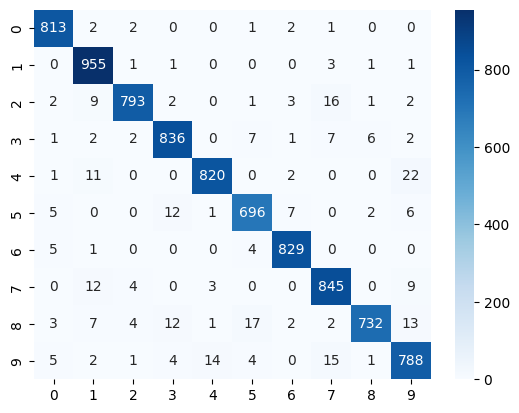

In [15]:
print(f"Accuracy score:{accuracy_score(y_test, y_pred)}")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd',  cmap = 'Blues')

In [16]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [17]:
pca = PCA(n_components = 100)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [18]:
knn = KNeighborsClassifier()
knn.fit(x_train_trf, y_train)

KNeighborsClassifier()

In [19]:
Y_pred = knn.predict(x_test_trf)

Accuracy score:0.9516666666666667


<Axes: >

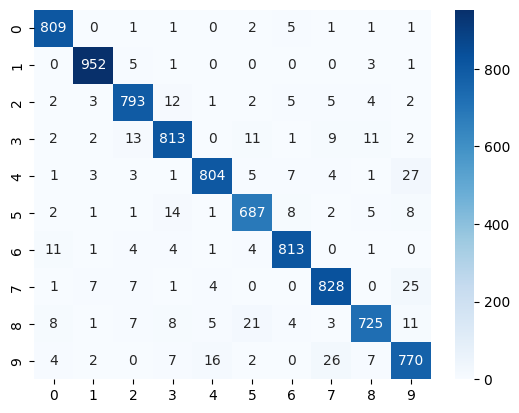

In [20]:
print(f"Accuracy score:{accuracy_score(y_test, Y_pred)}")
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot = True, fmt = 'd',  cmap = 'Blues')

# 2D visualisation 

In [21]:
pca = PCA(n_components = 2)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [22]:
x_train_trf

array([[-0.84734518,  1.74755121],
       [-2.20893828, -5.39628529],
       [-4.19088889,  0.60874527],
       ...,
       [ 4.46292865, -0.63829158],
       [-4.50163308, -1.1969888 ],
       [ 0.11937493,  0.96073123]])

In [23]:
y_train_trf = y_train.astype(str)
fig = px.scatter(x = x_train_trf[:, 0],
                y = x_train_trf[:, 1],
                color = y_train_trf,
                color_discrete_sequence = px.colors.qualitative.G10)

fig.show()

# 3D Visualisation

In [24]:
pca = PCA(n_components = 3)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [25]:
x_train_trf.shape

(33600, 3)

In [26]:
y_train_trf = y_train.astype(str)

fig = px.scatter_3d(
    x=x_train_trf[:, 0],
    y=x_train_trf[:, 1],
    z=x_train_trf[:, 2],
    color=y_train_trf,
    labels={'x': 'Dim 1', 'y': 'Dim 2', 'z': 'Dim 3'},
    title='3D Scatter Plot',
    color_discrete_sequence=px.colors.qualitative.G10
)

fig.show()


In [27]:
pca.explained_variance_
# eigen values

array([40.71663636, 29.14088302, 26.81721373])

In [28]:
pca.components_
#eigen vectors

array([[ 2.32995591e-18, -3.72436292e-18,  2.31461154e-21, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.68715801e-17, -2.35719172e-17,  1.51239548e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 2.46999947e-18,  4.02314806e-17, -1.90443945e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])